<a href="https://colab.research.google.com/github/mm79Code/Recommendation-AlGOs/blob/main/Copy_of_Recommendation_SimpleFormulaBased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Context:
With the advent of technology, societies have become more efficient with their lives. At the same time, however,individua lhuman lives have also become more fast-paced and distracted, leaving little time to explore artistic pursuits.Also technology has made significant advancements in the ability to coexist with art and general entertainment.It has infact made it easier for humans with a shortage of time to find and consume good content.

Almost every internet-based company's revenue relies on the time consumers spend on its platform. These companies need to be able to figure out what kind of content is needed in order to increase customer time spent and make their experience better. Therefore, one of the key challenges for these companies is figuring out what kind of content their customers are most likely to consume.

## Objective
Build a recommendation system to propose the top10 songs for a user based on the likelihood of listening to those songs.

## DataDictionary
The core dataset is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the songid, titles, release, artistname,and the yearofrelease.Thesecondfilecontainstheuserid,songid,andtheplaycountof users.

### song_data
* song_id:A unique id given to every song
* title:Title of the song
* Release:Name of the released album
* Artist_name:Name of the artist
* year:Year of releasecount_data
* user _id:A unique id given to the user
* song_id:A unique id given to the song
* play_count:Number of times the song was played

### count_data
* user _id:A unique id given to the user
* song_id:A unique id given to the song
* play_count:Number of times the song was played

### **Importing Libraries and the Dataset**

In [ ]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
import sklearn.metrics.pairwise as pw

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
songdata = pd.read_csv("/content/drive/MyDrive/ColabCodeRepo/MusicRecommendation/DataFiles/song_data.csv")
countdata = pd.read_csv("/content/drive/MyDrive/ColabCodeRepo/MusicRecommendation/DataFiles/count_data.csv")
songdata.head()
countdata.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
countdata.head(10)



,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
songdata.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [ ]:
#Let us check the data types and and missing values of each column
countdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [ ]:
# See the info of the song_df data
songdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [ ]:
# Find out the number of songs played in a year
songdata.groupby('year').count()

,song_id,title,release,artist_name
year,,,,
0,484424,484409,484419,484424
1922,6,6,6,6
1924,5,5,5,5
1925,7,7,7,7
1926,19,19,19,19
...,...,...,...,...
2007,39414,39414,39414,39414
2008,34770,34770,34770,34770
2009,31051,31051,31051,31051


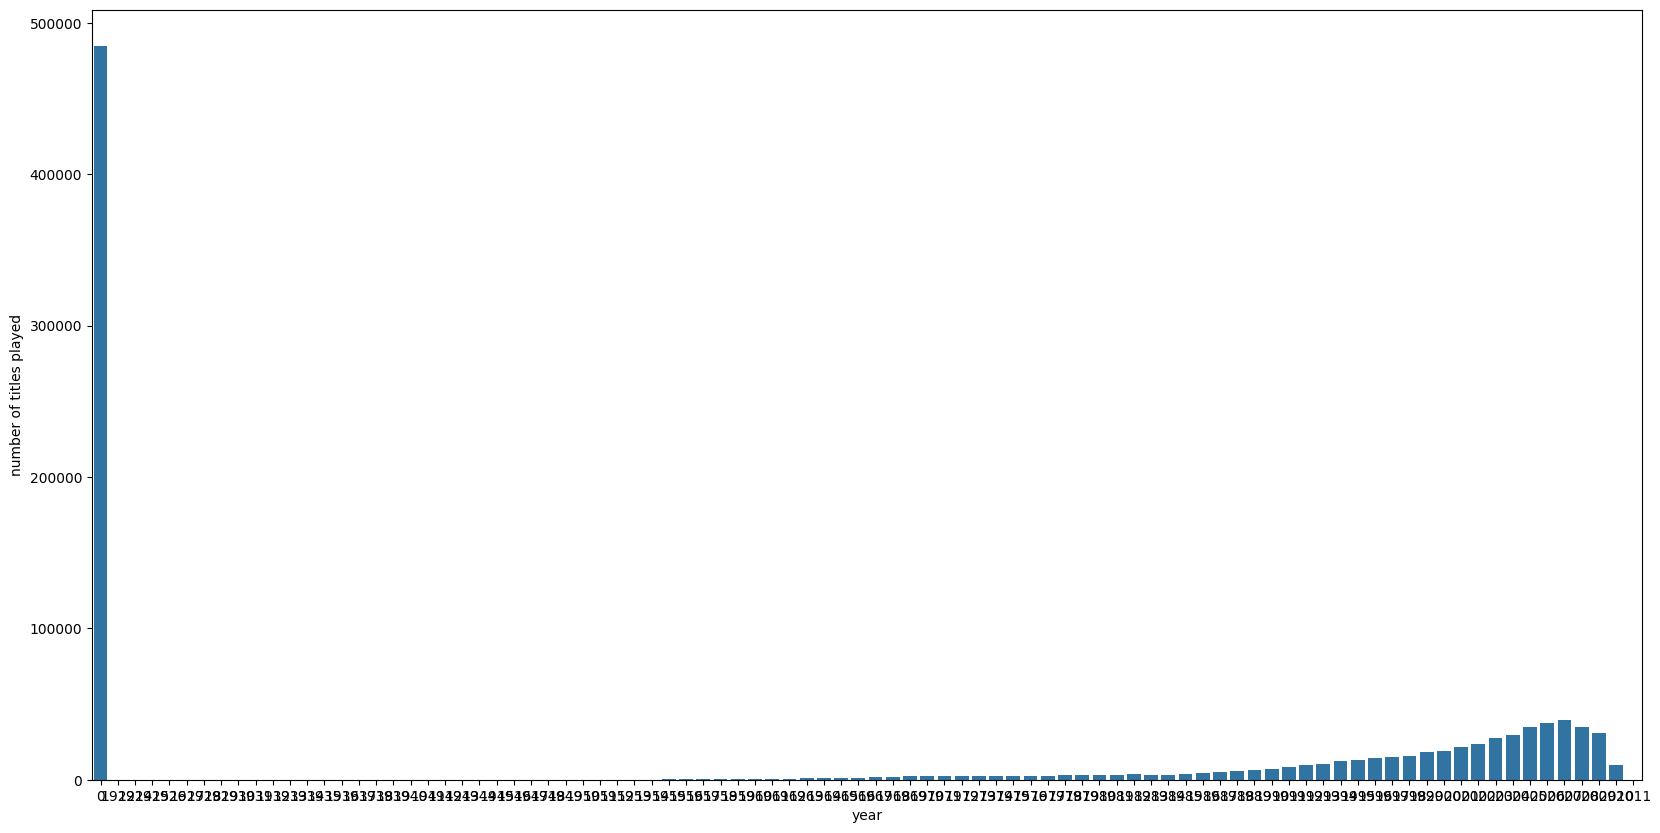

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.countplot(x='year', data=songdata)
plt.ylabel("number of titles played")
plt.show()


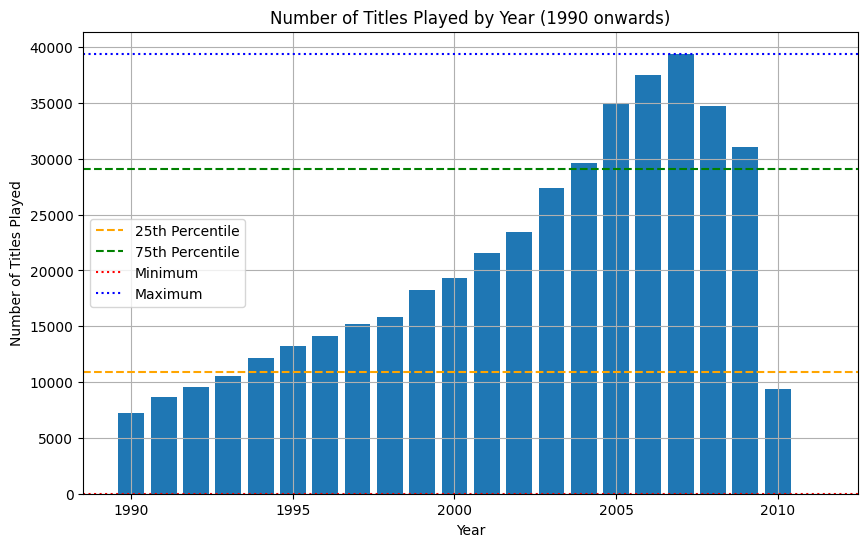

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
year_data = songdata.groupby('year')['title'].count()
# Filter years directly from year_data.index
years = year_data.index[year_data.index >= 1990]
counts = year_data.values[year_data.index >= 1990]

p25 = np.percentile(counts, 25)
p75 = np.percentile(counts, 75)

min_count = np.min(counts)
max_count = np.max(counts)

plt.figure(figsize=(10, 6))
plt.bar(years, counts)
plt.xlabel('Year')
plt.ylabel('Number of Titles Played')
plt.title('Number of Titles Played by Year (1990 onwards)')

plt.axhline(y=p25, color='orange', linestyle='--', label='25th Percentile')
plt.axhline(y=p75, color='green', linestyle='--', label='75th Percentile')
plt.axhline(y=min_count, color='red', linestyle=':', label='Minimum')
plt.axhline(y=max_count, color='blue', linestyle=':', label='Maximum')

plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# # prompt: box plot for each year with number of play by title

# import matplotlib.pyplot as plt
# import seaborn as sns # Import seaborn

# plt.figure(figsize=(20, 10))
# # Verify 'year' is present, if not, adjust accordingly
# print(countdata.columns)
# sns.boxplot(x='Year', y='play_count', data=countdata[countdata['Year'] >= 1990])
# plt.ylabel("Number of play by title")
# plt.show()
songdata.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [ ]:
# prompt: join songdata and count data

import pandas as pd
merged_data = pd.merge(countdata, songdata, on='song_id', how='left')
merged_data.head()


,Unnamed: 0,user_id,song_id,play_count,title,release,artist_name,year
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005


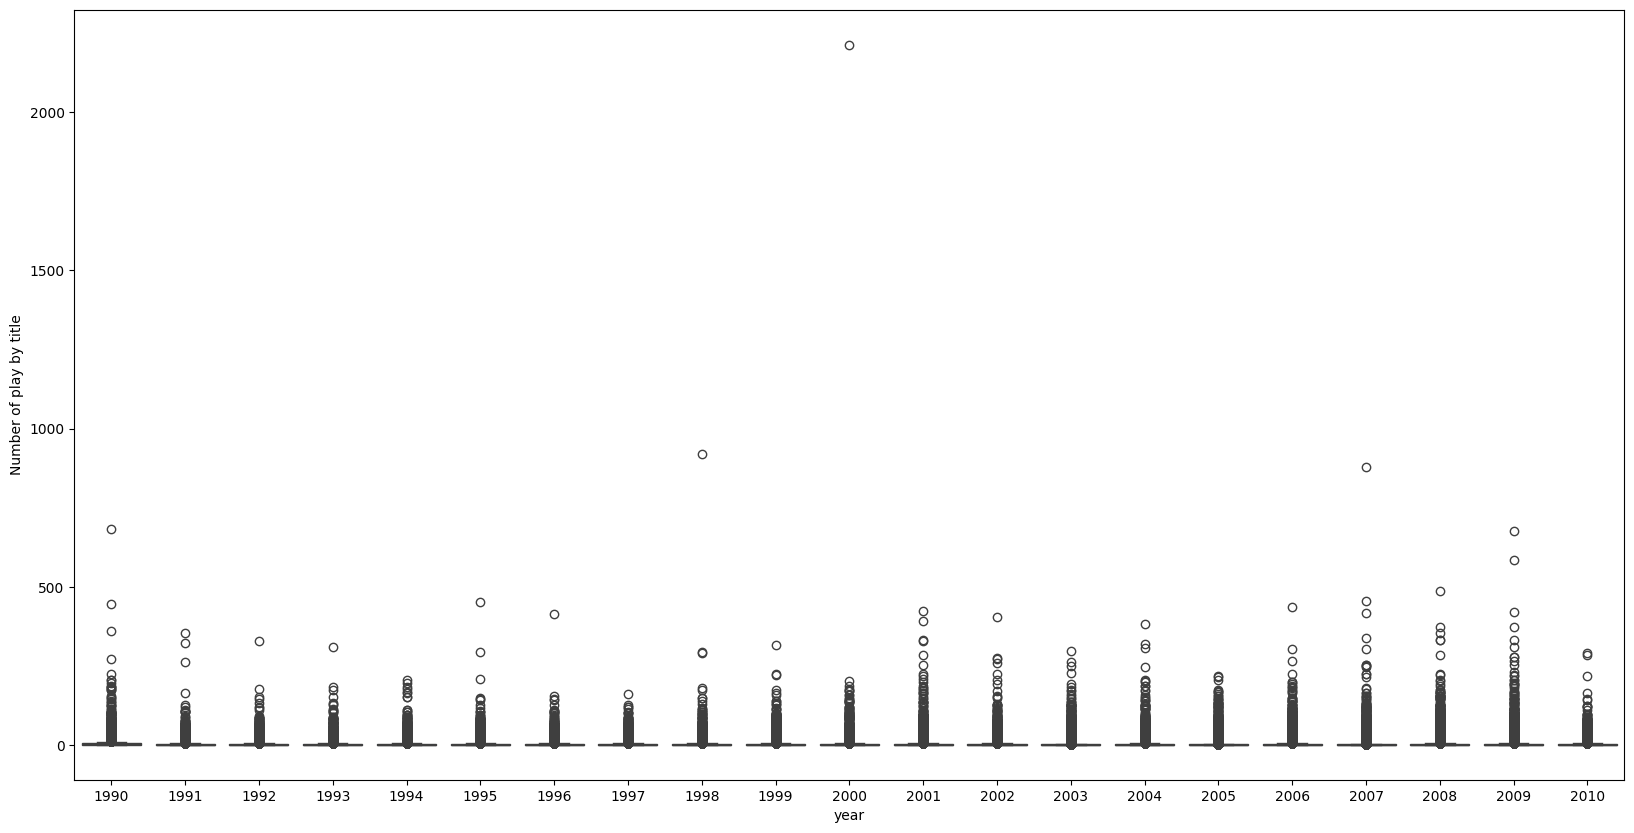

In [ ]:
# prompt: generate a box plot for each year for the tiles and play count for years 1990 onwards

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.boxplot(x='year', y='play_count', data=merged_data[merged_data['year'] >= 1990])
plt.ylabel("Number of play by title")
plt.show()





In [ ]:
# prompt: removed the titles from the merged data to removed the outliers in the data

# Calculate IQR for play_count
Q1 = merged_data['play_count'].quantile(0.25)
Q3 = merged_data['play_count'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
merged_data_filtered = merged_data[(merged_data['play_count'] >= lower_bound) & (merged_data['play_count'] <= upper_bound)]

# Display the filtered data
print(merged_data_filtered.head())


   Unnamed: 0                                   user_id             song_id  \
0           0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1           1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2           2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3           2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
4           3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   

   play_count            title              release    artist_name  year  
0           1         The Cove   Thicker Than Water   Jack Johnson     0  
1           2  Entre Dos Aguas  Flamenco Para Niños  Paco De Lucia  1976  
2           1         Stronger           Graduation     Kanye West  2007  
3           1         Stronger           Graduation     Kanye West  2007  
4           1   Constellations    In Between Dreams   Jack Johnson  2005  


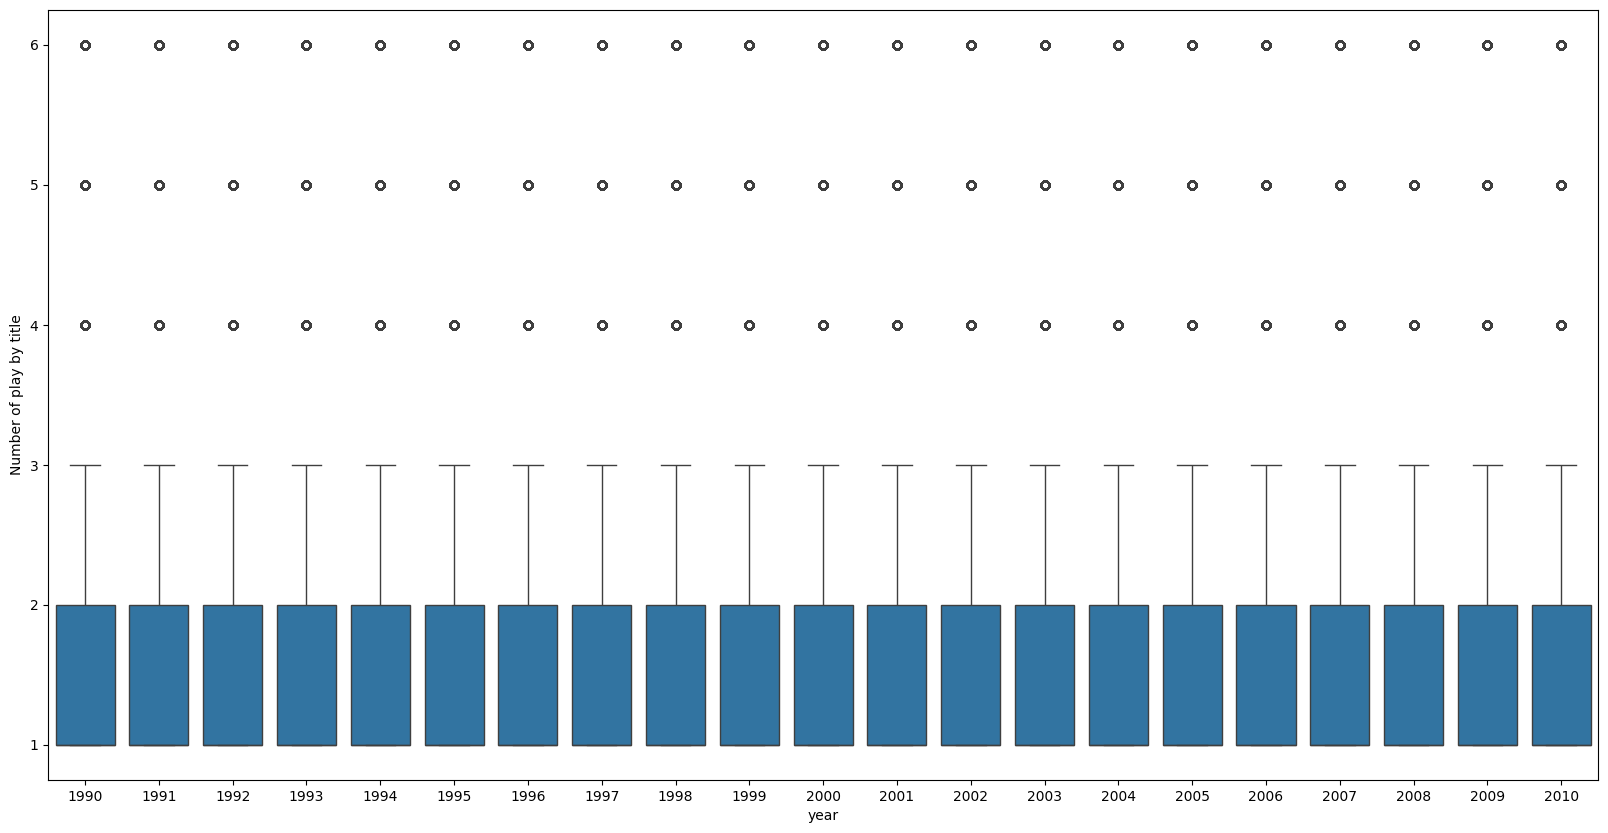

In [ ]:
# prompt: create the box plot to check there is no outlier

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.boxplot(x='year', y='play_count', data=merged_data_filtered[merged_data_filtered['year'] >= 1990])
plt.ylabel("Number of play by title")
plt.show()


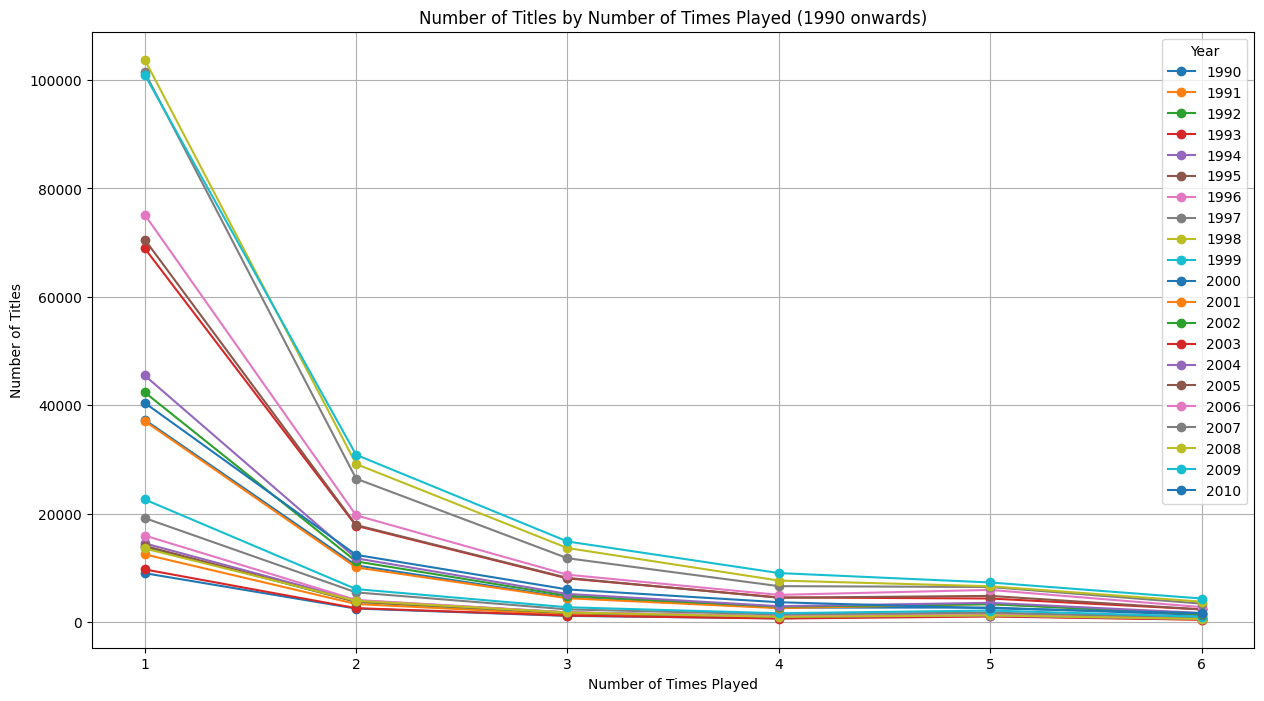

In [ ]:
# prompt: Create a chart to show number of Titles by Number of times played for each year of 1990 onwards

import matplotlib.pyplot as plt

# Group data by year and count the number of titles for each play count
yearly_play_counts = merged_data_filtered[merged_data_filtered['year'] >= 1990].groupby(['year', 'play_count'])['title'].count().reset_index(name='num_titles')

# Plot the data
plt.figure(figsize=(15, 8))
for year in yearly_play_counts['year'].unique():
    year_data = yearly_play_counts[yearly_play_counts['year'] == year]
    plt.plot(year_data['play_count'], year_data['num_titles'], label=year, marker='o')

plt.xlabel('Number of Times Played')
plt.ylabel('Number of Titles')
plt.title('Number of Titles by Number of Times Played (1990 onwards)')
plt.legend(title='Year', loc='upper right')
plt.grid(True)
plt.show()


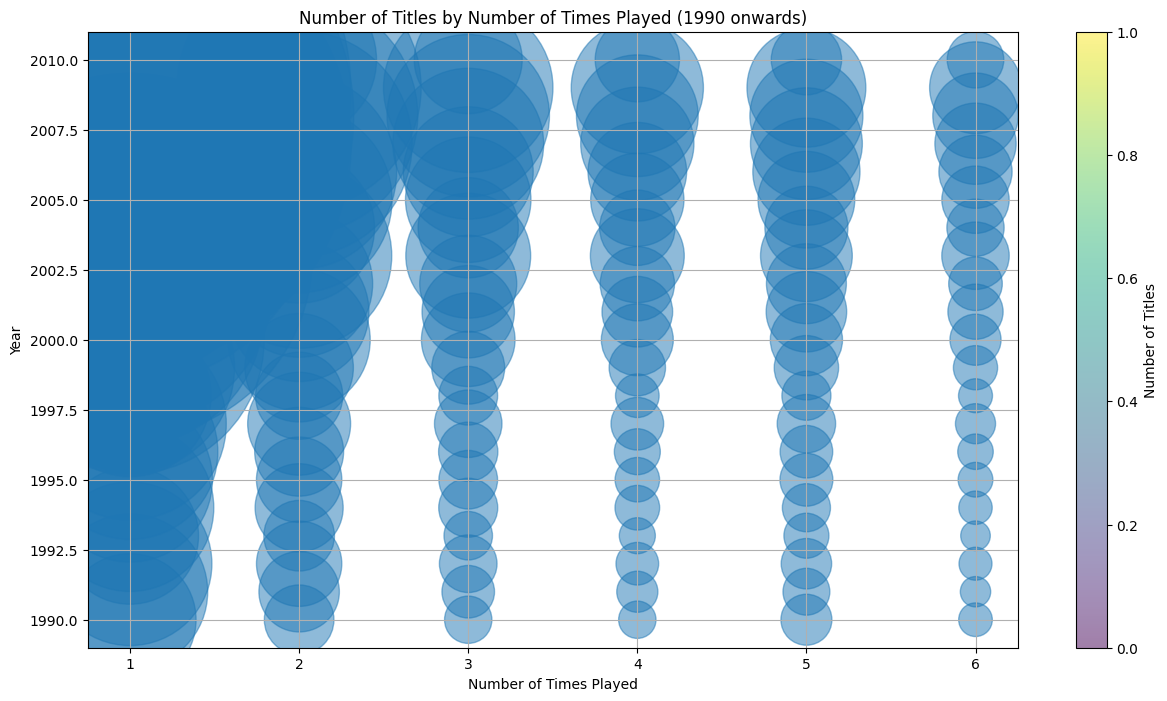

In [ ]:
# prompt: change the chart to a bubble chart

import matplotlib.pyplot as plt
# Group data by year and count the number of titles for each play count
yearly_play_counts = merged_data_filtered[merged_data_filtered['year'] >= 1990].groupby(['year', 'play_count'])['title'].count().reset_index(name='num_titles')

# Plot the data as a bubble chart
plt.figure(figsize=(15, 8))
plt.scatter(yearly_play_counts['play_count'], yearly_play_counts['year'], s=yearly_play_counts['num_titles'], alpha=0.5)

plt.xlabel('Number of Times Played')
plt.ylabel('Year')
plt.title('Number of Titles by Number of Times Played (1990 onwards)')
plt.colorbar(label='Number of Titles')
plt.grid(True)
plt.show()


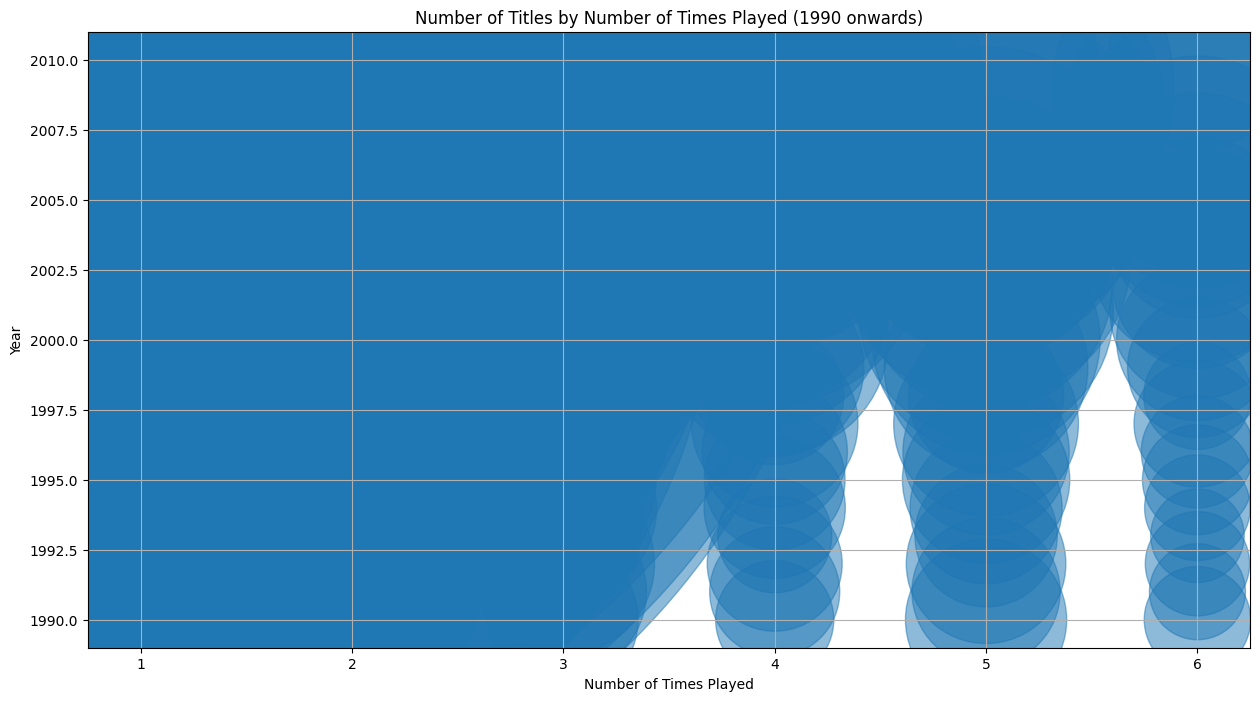

In [ ]:
# prompt: change the chart to scatter plot

import matplotlib.pyplot as plt
# Group data by year and count the number of titles for each play count
yearly_play_counts = merged_data_filtered[merged_data_filtered['year'] >= 1990].groupby(['year', 'play_count'])['title'].count().reset_index(name='num_titles')

# Plot the data as a scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(yearly_play_counts['play_count'], yearly_play_counts['year'], s=yearly_play_counts['num_titles']*10, alpha=0.5)  # Increased marker size for visibility

plt.xlabel('Number of Times Played')
plt.ylabel('Year')
plt.title('Number of Titles by Number of Times Played (1990 onwards)')
# plt.colorbar(label='Number of Titles')  # Colorbar is not applicable for scatter plots
plt.grid(True)
plt.show()


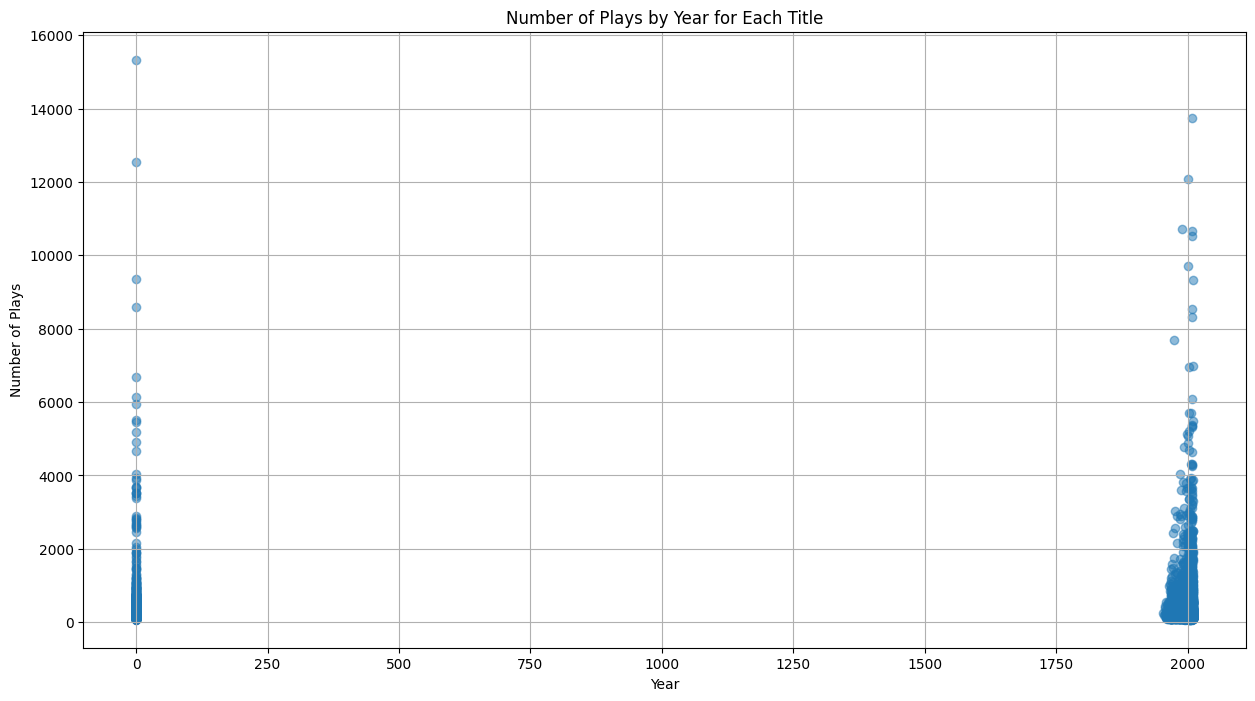

In [ ]:
# prompt: create a scatter plot , each title as a marker, x axis as Year and Y axis as number of play

import matplotlib.pyplot as plt
# Group data by title, year, and sum the play counts
title_year_plays = merged_data_filtered.groupby(['title', 'year'])['play_count'].sum().reset_index()

# Plot the data as a scatter plot
plt.figure(figsize=(15, 8))
plt.scatter(title_year_plays['year'], title_year_plays['play_count'], alpha=0.5)

plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.title('Number of Plays by Year for Each Title')
plt.grid(True)
plt.show()


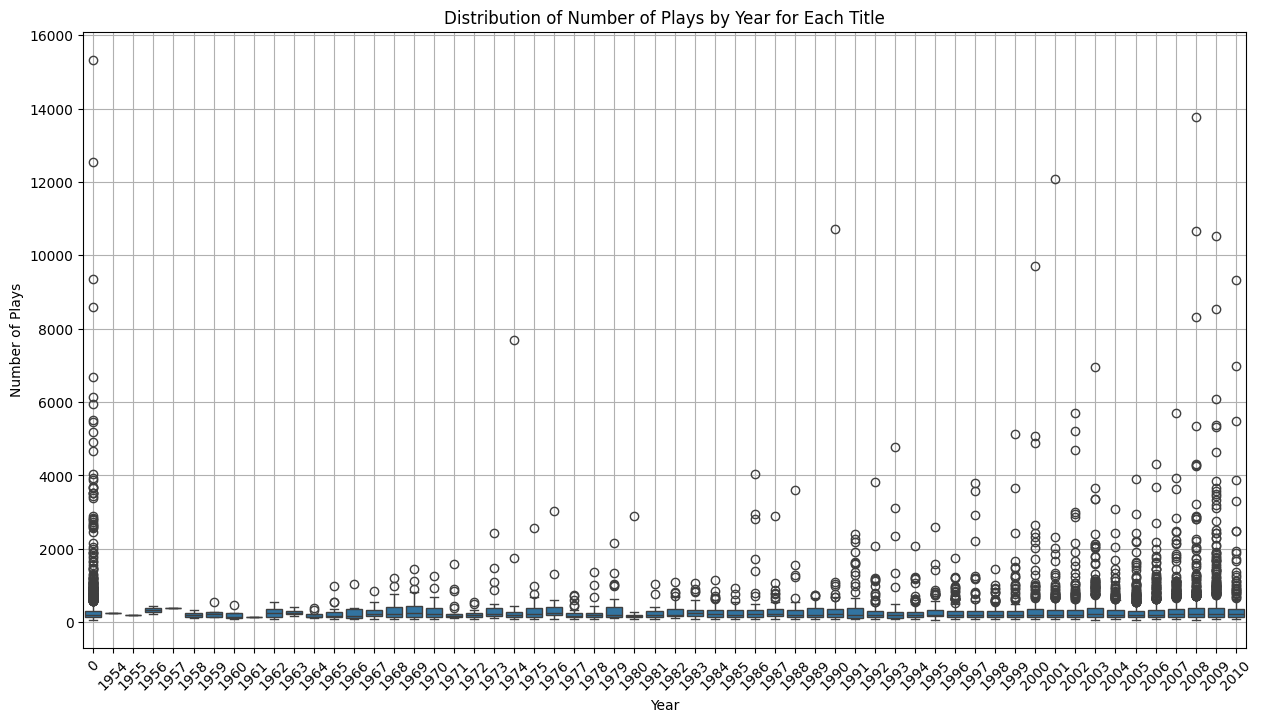

In [ ]:
# prompt: create a box plot for the above data

import matplotlib.pyplot as plt
# Group data by title, year, and sum the play counts
title_year_plays = merged_data_filtered.groupby(['title', 'year'])['play_count'].sum().reset_index()

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='play_count', data=title_year_plays)

plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.title('Distribution of Number of Plays by Year for Each Title')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


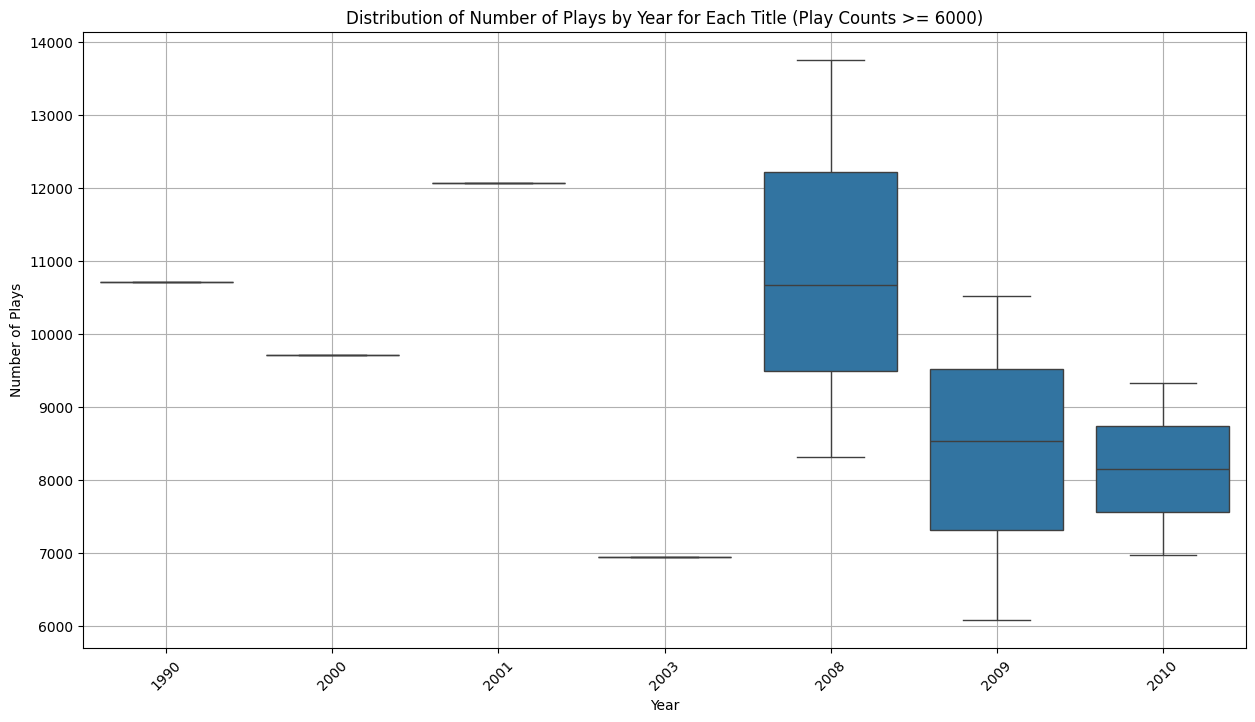

In [ ]:
# prompt: removed the data where number of plays is <6000 by year for years 1990 onwards

import matplotlib.pyplot as plt
# Group data by title, year, and sum the play counts
title_year_plays = merged_data_filtered.groupby(['title', 'year'])['play_count'].sum().reset_index()

# Filter data for years 1990 onwards and play counts >= 6000
filtered_plays = title_year_plays[(title_year_plays['year'] >= 1990) & (title_year_plays['play_count'] >= 6000)]

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='play_count', data=filtered_plays)

plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.title('Distribution of Number of Plays by Year for Each Title (Play Counts >= 6000)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


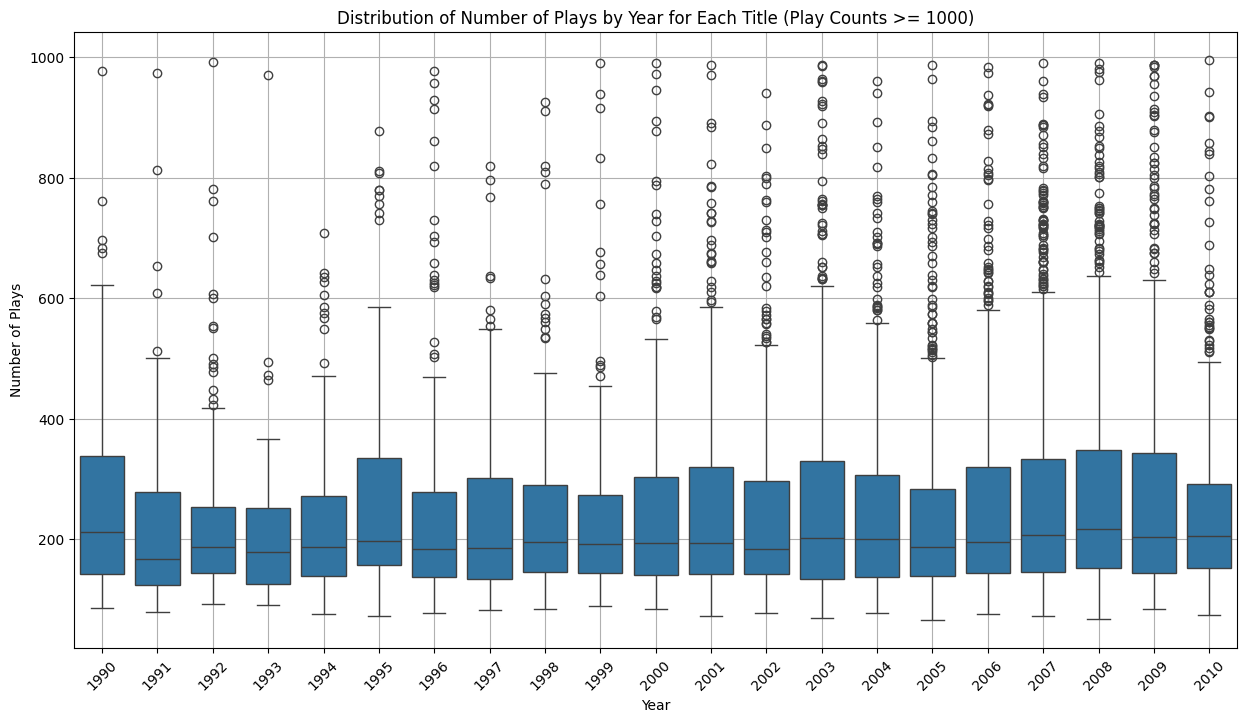

In [ ]:
# prompt: removed the data where number of plays is <1000 by year for years 1990 onwards and generate a box plot

import matplotlib.pyplot as plt
# Group data by title, year, and sum the play counts
title_year_plays = merged_data_filtered.groupby(['title', 'year'])['play_count'].sum().reset_index()

# Filter data for years 1990 onwards and play counts >= 1000
filtered_plays = title_year_plays[(title_year_plays['year'] >= 1990) & (title_year_plays['play_count'] <= 1000)]

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='play_count', data=filtered_plays)

plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.title('Distribution of Number of Plays by Year for Each Title (Play Counts >= 1000)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()



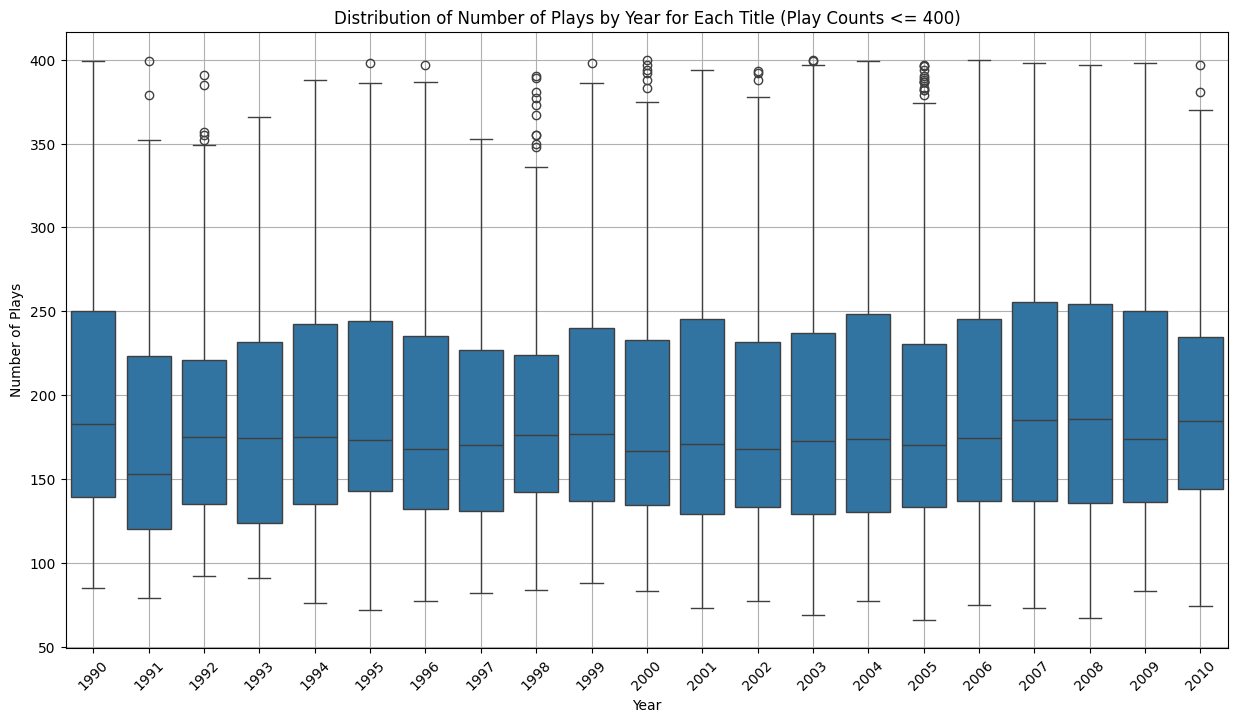

In [ ]:
# prompt: removed the data where number of plays is <400 by year for years 1990 onwards and generate a box plot

import matplotlib.pyplot as plt
# Group data by title, year, and sum the play counts
title_year_plays = merged_data_filtered.groupby(['title', 'year'])['play_count'].sum().reset_index()

# Filter data for years 1990 onwards and play counts >= 400
filtered_plays = title_year_plays[(title_year_plays['year'] >= 1990) & (title_year_plays['play_count'] <= 400)]

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='play_count', data=filtered_plays)

plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.title('Distribution of Number of Plays by Year for Each Title (Play Counts <= 400)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


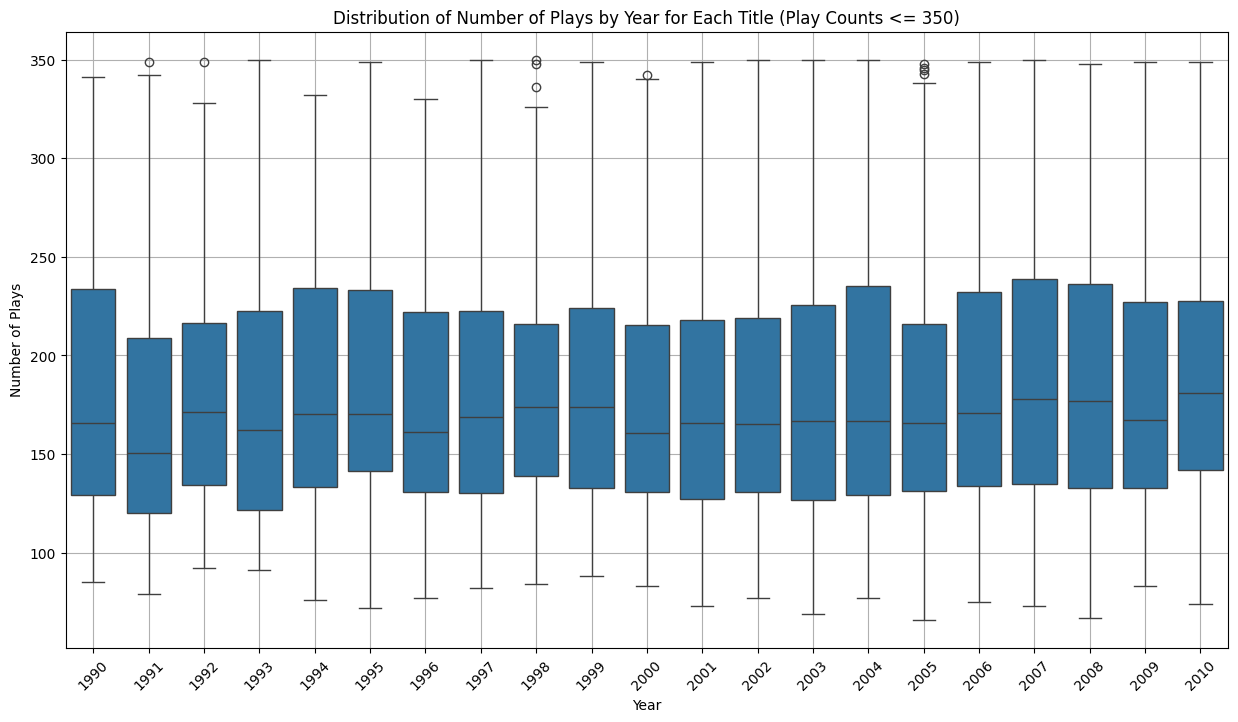

In [ ]:
# prompt: removed the outliers where number of plays per year is more than 350 and replot the box plot

import matplotlib.pyplot as plt
# Group data by title, year, and sum the play counts
title_year_plays = merged_data_filtered.groupby(['title', 'year'])['play_count'].sum().reset_index()

# Filter data for years 1990 onwards and play counts <= 350
filtered_plays = title_year_plays[(title_year_plays['year'] >= 1990) & (title_year_plays['play_count'] <= 350)]

# Create a box plot
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='play_count', data=filtered_plays)

plt.xlabel('Year')
plt.ylabel('Number of Plays')
plt.title('Distribution of Number of Plays by Year for Each Title (Play Counts <= 350)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


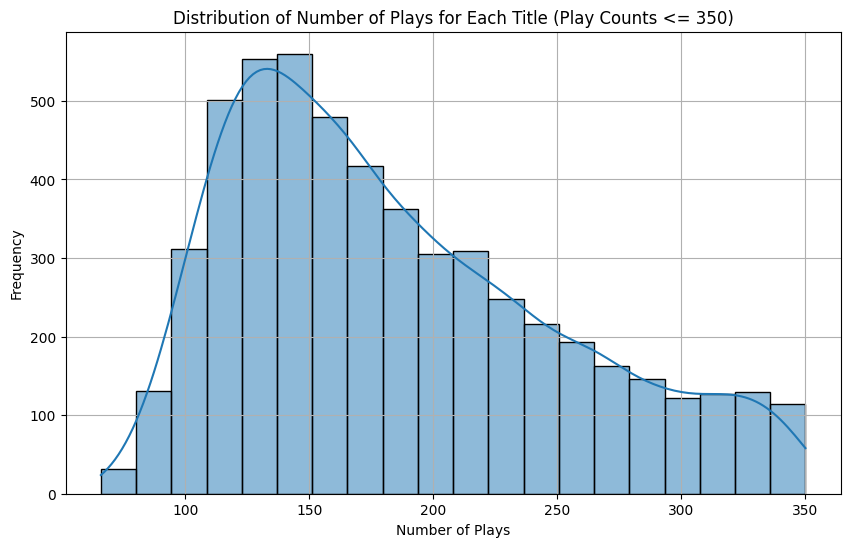

In [ ]:
# prompt: generate a distribution chart for filtered_plays

import matplotlib.pyplot as plt
# Create a distribution plot (histogram)
plt.figure(figsize=(10, 6))
sns.histplot(filtered_plays['play_count'], bins=20, kde=True)

plt.xlabel('Number of Plays')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Plays for Each Title (Play Counts <= 350)')
plt.grid(True)
plt.show()


# Lets use two different Approach for Recommendation
## Simple Approach Hypothesis Based
### Hypoothesis:
* If a song is played by 75 % of the users throughout the years, It will be mostly highly favoured.
* Recommend Top 10 Songs based on the number of times a song is played by 75% of the users






In [ ]:
# prompt: find the 75 percentile play count for each song from 1990 onwards with play count <=350 then order the songs in descending order and pick top 10 songs

# Filter data for years 1990 onwards and play counts <= 350
filtered_plays = title_year_plays[(title_year_plays['year'] >= 1990) & (title_year_plays['play_count'] <= 350)]
# filtered_plays = title_year_plays[(title_year_plays['year'] >= 1990)]

# Calculate the 75th percentile play count for each song
# top_songs = filtered_plays.groupby('title')['play_count'].quantile(0.9).reset_index(name='percentile_75')

# # Sort the songs in descending order of 75th percentile play count
# top_songs_sorted = top_songs.sort_values('percentile_75', ascending=False)

# # Select the top 10 songs
# top_10_songs = top_songs_sorted.head(10)

# print(top_10_songs)


In [ ]:
# prompt: find the % of users played each song from 1990 onwards, which had playe count <=350

# Calculate the total number of users
total_users = countdata['user_id'].nunique()

# Merge filtered_plays with the original data to get user_id
filtered_plays_with_users = filtered_plays.merge(merged_data_filtered[['title', 'user_id']], on='title', how='left')

# Group the filtered data by song title and count the number of unique users who played each song
# user_counts_per_song = filtered_plays_with_users.groupby('title')['user_id'].nunique().reset_index(name='num_users')

user_counts_per_song = filtered_plays_with_users.groupby('title')['user_id'].count().reset_index(name='num_users')


# Calculate the percentage of users who played each song
user_counts_per_song['percentage_users'] = (user_counts_per_song['num_users'] / total_users) * 100

# Display the results
# print(user_counts_per_song)
# total_users
user_counts_per_song



,title,num_users,percentage_users
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,77,0.100847
1,'97 Bonnie & Clyde,92,0.120493
2,'Round Midnight,372,0.487211
3,(Antichrist Television Blues),174,0.227889
4,(I Cant Get No) Satisfaction,78,0.102157
...,...,...,...
5298,teachme (Album Version),64,0.083821
5299,the Love Song,61,0.079892
5300,you were there with me,79,0.103467
5301,¡Viva La Gloria! (Album Version),152,0.199075


In [ ]:
# prompt: find total unique users who payed the songs from 1990 onwards, consider the only songs which were played <=350 times

# Calculate the total number of unique users who played songs from 1990 onwards with play counts <= 350
filtered_plays_with_users = filtered_plays.merge(merged_data_filtered[['title', 'user_id']], on='title', how='left')
total_unique_users = filtered_plays_with_users['user_id'].nunique()

user_counts_per_song = filtered_plays_with_users.groupby('title')['user_id'].count().reset_index(name='num_users')
user_counts_per_song['play_count'] = filtered_plays_with_users.groupby('title')['play_count'].max().reset_index(name='max_play_count')['max_play_count']
user_counts_per_song
user_counts_per_song['percentage_users'] = (user_counts_per_song['num_users'] / total_unique_users) * 100

most_liked_songs= user_counts_per_song.sort_values('percentage_users', ascending=False)
most_liked_songs.head(10)



,title,num_users,play_count,percentage_users
622,Breathe,6172,345,8.772154
1899,Home,4118,238,5.852840
2047,I Want You,3891,197,5.530209
436,Beautiful,2652,329,3.769241
3996,Someday,2484,190,3.530465
1819,Hello,2218,286,3.152404
1920,Hotel California,1782,219,2.532725
2713,Magic,1770,203,2.515670
2176,In The End (Album Version),1552,180,2.205830
1698,Gravity,1544,171,2.194460


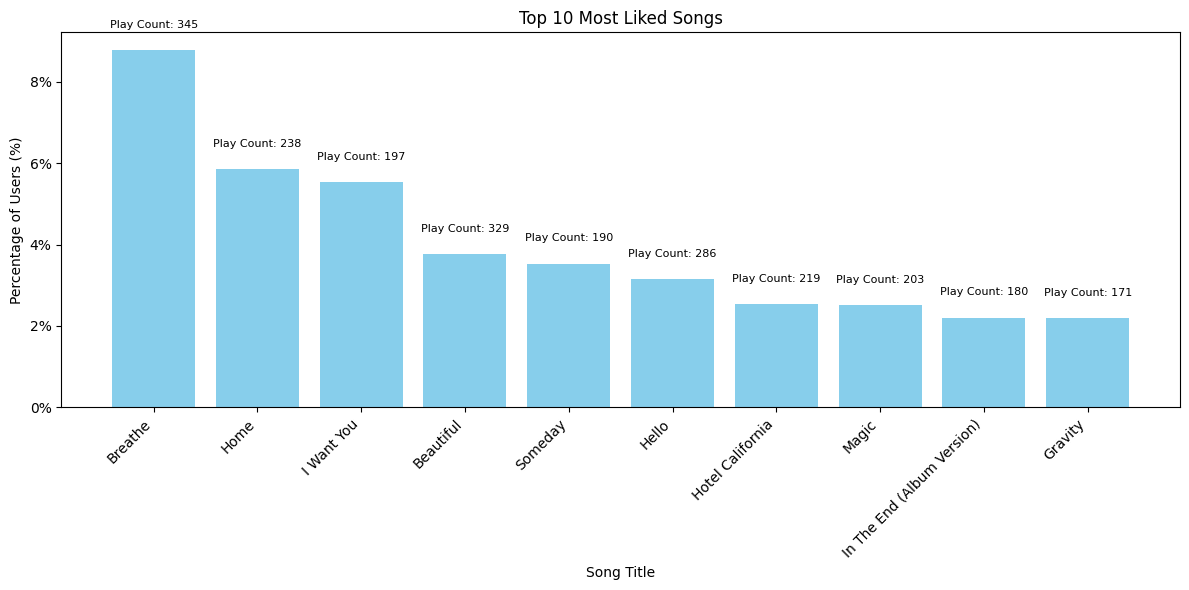

In [ ]:
# prompt: create a bar chart with play count and percentage of users in descending order and show the play count as additional text. Clearly indicate metric name and value on top of the Bars in the bar chart , y axis ticks should show % sign

import matplotlib.pyplot as plt
# Sort the data in descending order of percentage users
most_liked_songs = most_liked_songs.sort_values('percentage_users', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(most_liked_songs['title'][:10], most_liked_songs['percentage_users'][:10], color='skyblue')

# Add play count as text on top of the bars
for bar, play_count in zip(bars, most_liked_songs['play_count'][:10]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"Play Count: {play_count}", ha='center', va='bottom', fontsize=8)

# Set the title and labels
plt.title('Top 10 Most Liked Songs')
plt.xlabel('Song Title')
plt.ylabel('Percentage of Users (%)')
plt.xticks(rotation=45, ha='right')

# Add % sign to y-axis ticks
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))

# Display the plot
plt.tight_layout()
plt.show()


## Collaborative Filtering Based Recommendation System